In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

분석 목적 : 과거의 판매 데이터를 바탕으로 향후의 판매량을 예측하기 위함

데이터 구조 파악

In [3]:
brand_keyword_cnt=pd.read_csv("/content/drive/MyDrive/비어플/온라인 판매량 예측/brand_keyword_cnt.csv")
brand_keyword_cnt
# 브랜드 연관 키워드 언급량을 정규화한 데이터

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
1,B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
2,B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
3,B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
4,B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,2.32085,2.98810,3.611830,4.061500,3.669850,3.771390,3.031620,2.988100,3.133150,...,2.422390,2.422390,2.756010,2.32085,2.088770,1.98723,1.07339,1.929210,2.509420,1.78416
3166,B002-03795,0.14505,0.00000,0.087030,0.072520,0.087030,0.101530,0.072520,0.130540,0.116040,...,0.000000,0.072520,0.000000,0.10153,0.101530,0.00000,0.00000,0.000000,0.000000,0.00000
3167,B002-03796,0.00000,0.00000,0.000000,0.000000,0.000000,0.101530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.072520,0.07252
3168,B002-03798,0.14505,0.00000,0.116040,0.072520,0.116040,0.275600,0.217580,0.116040,0.101530,...,0.101530,0.087030,0.145050,0.17406,0.188560,0.11604,0.11604,0.087030,0.174060,0.10153


In [4]:
brand_keyword_cnt['브랜드'].nunique()
# 총 3170개의 브랜드

3170

In [5]:
product_info=pd.read_csv("/content/drive/MyDrive/비어플/온라인 판매량 예측/product_info.csv")
product_info.head()

# 모든 제품에 대한 설명

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...


In [6]:
product_info['제품'].nunique()
# 총 12778개의 제품이 존재함

12778

In [7]:
sales=pd.read_csv("/content/drive/MyDrive/비어플/온라인 판매량 예측/sales.csv")
sales
# sales는 총 판매 가격을 의미함

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


In [8]:
train=pd.read_csv("/content/drive/MyDrive/비어플/온라인 판매량 예측/train.csv")
train
# train은 판매 개수를 의미함

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [9]:
train.columns

Index(['ID', '제품', '대분류', '중분류', '소분류', '브랜드', '2022-01-01', '2022-01-02',
       '2022-01-03', '2022-01-04',
       ...
       '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04'],
      dtype='object', length=465)

대분류, 중분류, 소분류, 브랜드 데이터 확인하기

In [10]:
train['대분류'].unique()
# 대분류 5가지

array(['B002-C001-0002', 'B002-C001-0003', 'B002-C001-0001',
       'B002-C001-0005', 'B002-C001-0004'], dtype=object)

In [11]:
train.groupby('대분류')['ID'].count()

대분류
B002-C001-0001     3768
B002-C001-0002    10954
B002-C001-0003      444
B002-C001-0004      111
B002-C001-0005      613
Name: ID, dtype: int64

In [12]:
train['중분류'].unique()
# 중분류 11가지

array(['B002-C002-0007', 'B002-C002-0008', 'B002-C002-0001',
       'B002-C002-0006', 'B002-C002-0004', 'B002-C002-0005',
       'B002-C002-0003', 'B002-C002-0002', 'B002-C002-0011',
       'B002-C002-0009', 'B002-C002-0010'], dtype=object)

In [13]:
train.groupby('중분류')['ID'].count()

중분류
B002-C002-0001    3608
B002-C002-0002     946
B002-C002-0003    1516
B002-C002-0004    1168
B002-C002-0005    2275
B002-C002-0006    1675
B002-C002-0007    2501
B002-C002-0008     410
B002-C002-0009    1144
B002-C002-0010      34
B002-C002-0011     613
Name: ID, dtype: int64

In [14]:
train['소분류'].unique()
# 소분류 53가지

array(['B002-C003-0038', 'B002-C003-0044', 'B002-C003-0003',
       'B002-C003-0032', 'B002-C003-0034', 'B002-C003-0039',
       'B002-C003-0019', 'B002-C003-0025', 'B002-C003-0001',
       'B002-C003-0004', 'B002-C003-0036', 'B002-C003-0005',
       'B002-C003-0012', 'B002-C003-0011', 'B002-C003-0016',
       'B002-C003-0009', 'B002-C003-0010', 'B002-C003-0052',
       'B002-C003-0053', 'B002-C003-0006', 'B002-C003-0007',
       'B002-C003-0029', 'B002-C003-0045', 'B002-C003-0015',
       'B002-C003-0002', 'B002-C003-0022', 'B002-C003-0008',
       'B002-C003-0018', 'B002-C003-0035', 'B002-C003-0037',
       'B002-C003-0046', 'B002-C003-0040', 'B002-C003-0047',
       'B002-C003-0014', 'B002-C003-0023', 'B002-C003-0021',
       'B002-C003-0020', 'B002-C003-0013', 'B002-C003-0017',
       'B002-C003-0024', 'B002-C003-0026', 'B002-C003-0048',
       'B002-C003-0049', 'B002-C003-0028', 'B002-C003-0027',
       'B002-C003-0041', 'B002-C003-0030', 'B002-C003-0042',
       'B002-C003-0033',

In [15]:
train.groupby('소분류')['ID'].count()

소분류
B002-C003-0001     751
B002-C003-0002     663
B002-C003-0003    1426
B002-C003-0004     426
B002-C003-0005     342
B002-C003-0006     175
B002-C003-0007     262
B002-C003-0008     112
B002-C003-0009     183
B002-C003-0010     113
B002-C003-0011     101
B002-C003-0012      75
B002-C003-0013     104
B002-C003-0014     236
B002-C003-0015     466
B002-C003-0016     342
B002-C003-0017     222
B002-C003-0018      71
B002-C003-0019     140
B002-C003-0020     112
B002-C003-0021     195
B002-C003-0022     356
B002-C003-0023     365
B002-C003-0024     289
B002-C003-0025     690
B002-C003-0026     150
B002-C003-0027     408
B002-C003-0028     174
B002-C003-0029     198
B002-C003-0030     153
B002-C003-0031      57
B002-C003-0032     265
B002-C003-0033     180
B002-C003-0034    1020
B002-C003-0035     641
B002-C003-0036     362
B002-C003-0037     184
B002-C003-0038     431
B002-C003-0039     432
B002-C003-0040     451
B002-C003-0041     366
B002-C003-0042      59
B002-C003-0043     117
B002-C0

In [16]:
train['브랜드'].nunique()
# 브랜드 53가지

3170

대분류, 중분류, 소분류 별로 제품 개수에 차이가 큼 -> 데이터 불균형 해소해야할듯?

Text(0.5, 1.0, 'small')

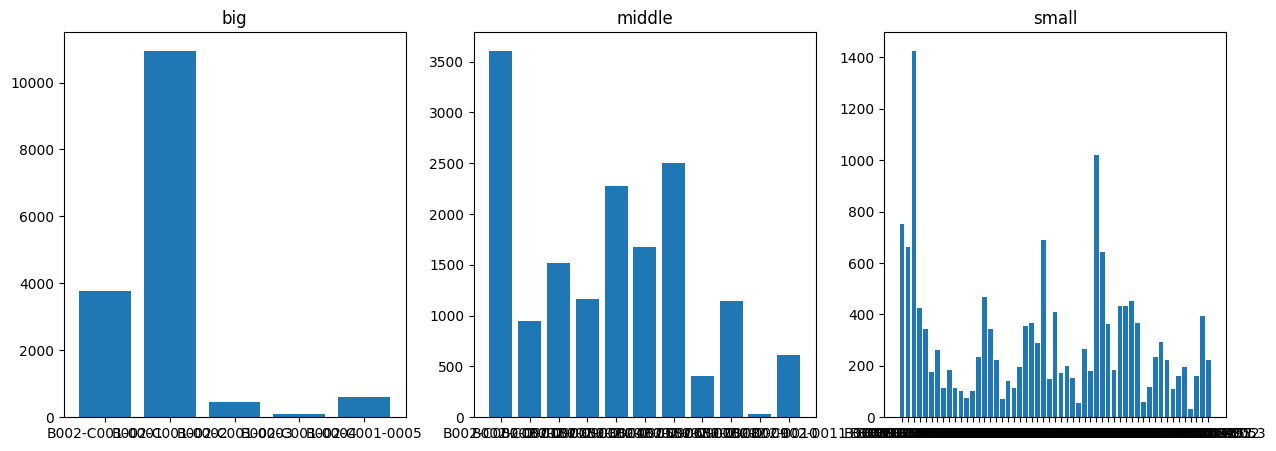

In [17]:
big=train.groupby('대분류')['ID'].count()
middle=train.groupby('중분류')['ID'].count()
small=train.groupby('소분류')['ID'].count()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].bar(big.index, train.groupby('대분류')['ID'].count())
axes[0].set_title('big')
axes[1].bar(middle.index, train.groupby('중분류')['ID'].count())
axes[1].set_title('middle')
axes[2].bar(small.index, train.groupby('소분류')['ID'].count())
axes[2].set_title('small')

In [18]:
train['ID'].nunique()

15890

In [19]:
train.groupby(['대분류','중분류','소분류'])['ID'].count()
# 총 53가지 경우가 존재함
# 요일, 공휴일 이런 것도 판매량에 영향이 있을까? -> 있으면 계절성이 있음을 의미 -> RNN 사용하면 자동으로 고려할 듯

대분류             중분류             소분류           
B002-C001-0001  B002-C002-0001  B002-C003-0001     751
                                B002-C003-0002     663
                                B002-C003-0003    1426
                                B002-C003-0004     426
                                B002-C003-0005     342
                B002-C002-0009  B002-C003-0051     160
B002-C001-0002  B002-C002-0002  B002-C003-0006     175
                                B002-C003-0007     262
                                B002-C003-0008     112
                                B002-C003-0009     183
                                B002-C003-0010     113
                                B002-C003-0011     101
                B002-C002-0003  B002-C003-0012      75
                                B002-C003-0013     104
                                B002-C003-0014     236
                                B002-C003-0015     466
                                B002-C003-0016     342
                  

In [20]:
merged_data2 = pd.merge(train[train['대분류']=='B002-C001-0001'], product_info, on='제품', how='inner')
merged_data2['제품특성']

0       생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...
1       주요 기능성(식약처인증):장건강 영양소 원료명(식약처고시):식이섬유 제품타입:구미/...
2       단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질...
3       홍삼농축액 함량:2.5% 고형분 함량:60% 포장형태:스틱형 1일 총 섭취량:1포 ...
4       홍삼농축액 함량:0% 고형분 함량:87% 1일 총 섭취량:1포 제품용량:개인별 다름...
                              ...                        
2637    주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 섭취대상:...
2638    생균:10억 CFU 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:...
2639    제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...
2640    제품유형:일반식품 종류:어류 분자량:600Da 섭취대상:성인남녀 제품타입:구미/젤리...
2641    제품유형:일반식품 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:구미/젤리...
Name: 제품특성, Length: 2642, dtype: object

In [21]:
merged_data = pd.merge(train[train['대분류']=='B002-C001-0004'], product_info, on='제품', how='inner')
merged_data['제품특성']

0     종류:유아선크림 PA지수:PA++ 자외선차단지수:32 포장형태:쿠션형 무첨가:무파라...
1     종류:유아선크림 PA지수:PA++ 자외선차단지수:32 포장형태:쿠션형 무첨가:무파라...
2     종류:유아선크림 PA지수:PA++++ 자외선차단지수:50 포장형태:튜브형 용량:50...
3     종류:유아선크림 PA지수:PA+++ 자외선차단지수:43 포장형태:쿠션형 특징:피부진...
4     종류:유아선로션 PA지수:PA+++ 자외선차단지수:SPF50+ 포장형태:튜브형 특징...
                            ...                        
84    종류:유아선스틱 PA지수:PA++++ 자외선차단지수:SPF50+ 포장형태:스틱형 특...
85    종류:유아선로션 PA지수:PA++++ 자외선차단지수:SPF50+ 포장형태:캡형 특징...
86    종류:유아선크림 PA지수:PA++++ 자외선차단지수:SPF50+ 포장형태:튜브형 특...
87    연령연령연령연령연령연령종류PA지수자외선차단지수포장형태특징특징특징무첨가용량타켓연령:2...
88    종류:유아선크림 PA지수:PA+++ 자외선차단지수:SPF43 포장형태:쿠션형 특징:...
Name: 제품특성, Length: 89, dtype: object

예시로 한 경우만 뽑아서 단일 시계열로 해보자

23년 2월 23일부터 판매량이 비정상적으로 감소하므로,

22년 1월 1일 ~ 23년 2월 22일 데이터만 사용해서 판매량 예측


In [22]:
train.groupby(['대분류','중분류'])['ID'].count()
# 대분류 B002-C001-0002가 데이터가 다른 대분류에 비해 훨씬 많음. -> 이는 좀 더 세부적으로 나눠서 예측
# 나머지는 그냥 대분류로만 해보자

대분류             중분류           
B002-C001-0001  B002-C002-0001    3608
                B002-C002-0009     160
B002-C001-0002  B002-C002-0002     946
                B002-C002-0003    1516
                B002-C002-0004    1168
                B002-C002-0005    2275
                B002-C002-0006    1675
                B002-C002-0007    2501
                B002-C002-0009     873
B002-C001-0003  B002-C002-0008     410
                B002-C002-0010      34
B002-C001-0004  B002-C002-0009     111
B002-C001-0005  B002-C002-0011     613
Name: ID, dtype: int64

In [23]:
data1=train[(train['대분류']=='B002-C001-0001')]
data2=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0002')]
data3=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0003')]
data4=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0004')]
data5=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0005')]
data6=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0006')]
data7=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0007')]
data8=train[(train['대분류']=='B002-C001-0002')&(train['중분류']=='B002-C002-0009')]
data9=train[(train['대분류']=='B002-C001-0003')]
data10=train[(train['대분류']=='B002-C001-0004')]
data11=train[(train['대분류']=='B002-C001-0005')]
# 브랜드는 다르지만, 대, 중, 소분류는 동일하기 때문에 아마 같은 제품이면서 브랜드만 다른 제품일 것이다. 그러므로 브랜드를 제외하고 생각

In [24]:
# 판매량이 급격히 줄어드는 부분은 제외
day1 = data1.columns[6:424]
data1_sum=data1[day1].sum()
day2 = data2.columns[6:424]
data2_sum=data2[day2].sum()
day3 = data3.columns[6:424]
data3_sum=data3[day3].sum()
day4 = data4.columns[6:424]
data4_sum=data4[day4].sum()
day5 = data5.columns[6:424]
data5_sum=data5[day5].sum()
day6 = data6.columns[6:424]
data6_sum=data6[day6].sum()
day7 = data7.columns[6:424]
data7_sum=data7[day7].sum()
day8 = data8.columns[6:424]
data8_sum=data8[day8].sum()
day9 = data9.columns[6:424]
data9_sum=data9[day9].sum()
day10 = data10.columns[6:424]
data10_sum=data10[day10].sum()
day11 = data11.columns[6:424]
data11_sum=data11[day11].sum()

In [25]:
data1_sum.index = pd.to_datetime(data1_sum.index)
data2_sum.index = pd.to_datetime(data2_sum.index)
data3_sum.index = pd.to_datetime(data3_sum.index)
data4_sum.index = pd.to_datetime(data4_sum.index)
data5_sum.index = pd.to_datetime(data5_sum.index)
data6_sum.index = pd.to_datetime(data6_sum.index)
data7_sum.index = pd.to_datetime(data7_sum.index)
data8_sum.index = pd.to_datetime(data8_sum.index)
data9_sum.index = pd.to_datetime(data9_sum.index)
data10_sum.index = pd.to_datetime(data10_sum.index)
data11_sum.index = pd.to_datetime(data11_sum.index)

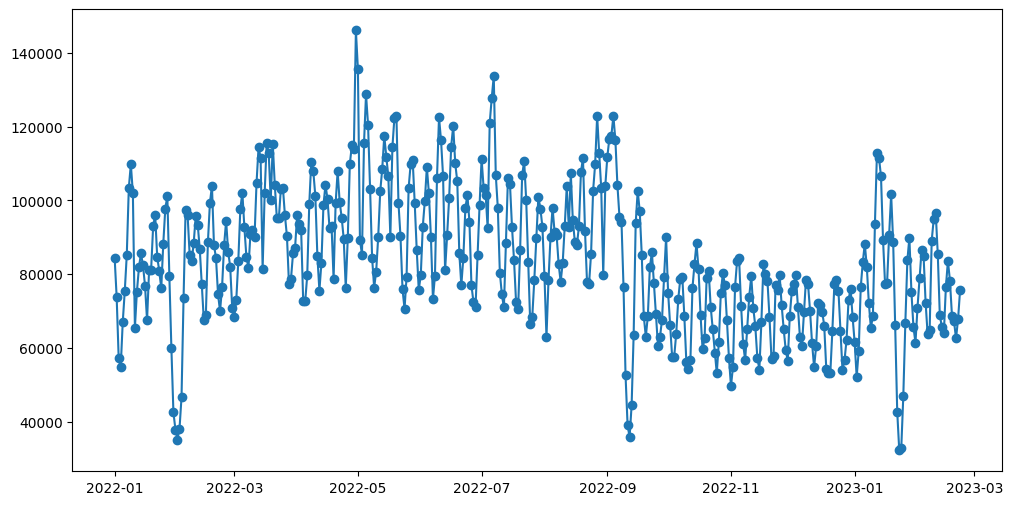

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data1_sum.index, data1_sum.values, marker='o', linestyle='-')

정상성을 확인해보고 싶음 / ADF Test

In [27]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

In [28]:
print('ADF TEST 결과')
adf_test(data1_sum)
# p-value 값이 0.05를 넘으므로 비정상성 데이터임

ADF TEST 결과
ADF Statistics: -1.804664
p-value: 0.378148
num of lags: 18.000000
num of observations: 399.000000
Critical values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


<Axes: >

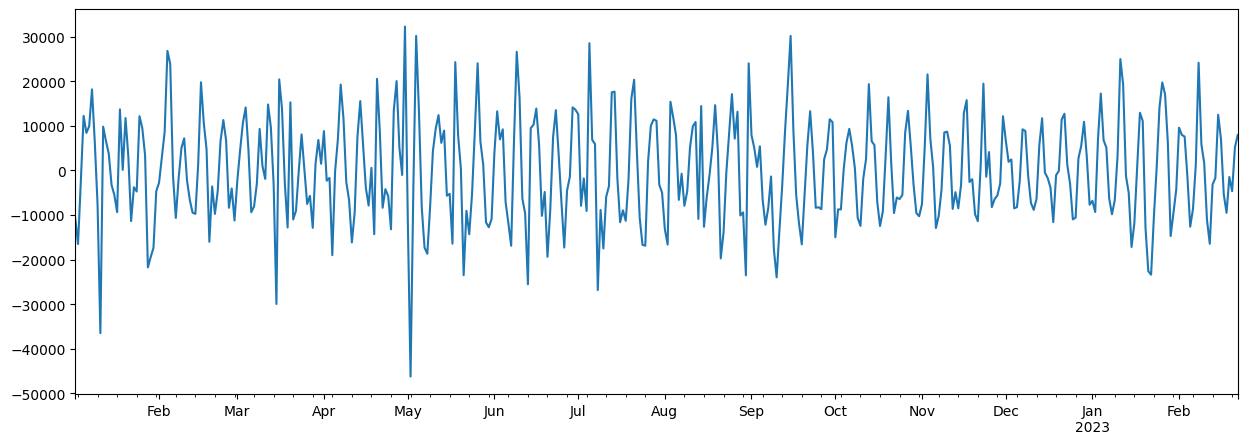

In [29]:
diff1 = data1_sum.diff().dropna()
diff1.plot(figsize=(15,5))

In [30]:
adf_test(diff1)
# 차분을 통해 비정상성 데이터를 정상성 데이터로 변환

ADF Statistics: -8.087695
p-value: 0.000000
num of lags: 17.000000
num of observations: 399.000000
Critical values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [31]:
data1_sum

2022-01-01    84536
2022-01-02    73870
2022-01-03    57336
2022-01-04    54769
2022-01-05    66988
              ...  
2023-02-18    68762
2023-02-19    67271
2023-02-20    62603
2023-02-21    67775
2023-02-22    75680
Length: 418, dtype: int64

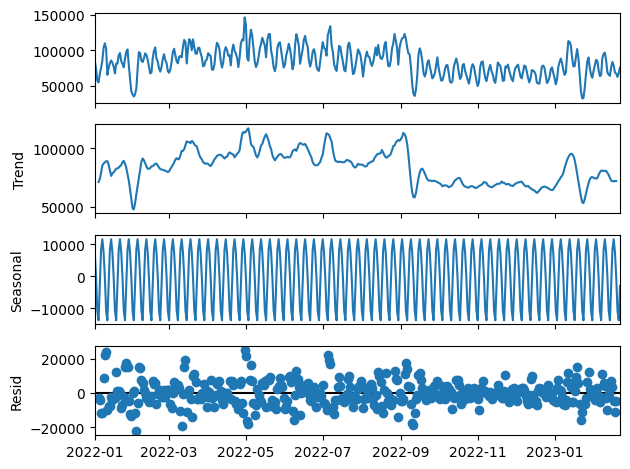

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(data1_sum, model = 'addictive', period=7)
result1.plot()
plt.show()

In [32]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [33]:
import pmdarima as pm
model1 = pm.auto_arima(
            y=data1_sum,
            d=1,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True,
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8985.983, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8942.385, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8927.809, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8983.986, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8928.551, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8926.813, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8863.771, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8818.012, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8893.174, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8816.090, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8926.534, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8891.172, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8

In [34]:
forecast1, conf_int1 = model1.predict(n_periods=62, return_conf_int=True)

# 예측 결과 출력
print("예측값:", forecast1)

# 신뢰구간 출력
print("신뢰구간:", conf_int1)

예측값: 2023-02-23    78981.534618
2023-02-24    78322.986321
2023-02-25    75923.704816
2023-02-26    73763.832492
2023-02-27    72756.577521
                  ...     
2023-04-21    74001.537330
2023-04-22    74001.537343
2023-04-23    74001.537335
2023-04-24    74001.537320
2023-04-25    74001.537309
Freq: D, Length: 62, dtype: float64
신뢰구간: [[ 60905.18024887  97057.88898782]
 [ 50422.16342132 106223.80921973]
 [ 44156.69878105 107690.71085033]
 [ 41187.32402515 106340.34095877]
 [ 40115.48221496 105397.67282729]
 [ 40175.8847722  105477.81454337]
 [ 40699.03106185 106146.23109552]
 [ 41007.31761998 107007.36265865]
 [ 40815.75331756 107800.03894468]
 [ 40264.06534042 108371.80943435]
 [ 39617.83803149 108727.14675248]
 [ 39053.44179562 108977.84267148]
 [ 38621.48960444 109233.63007051]
 [ 38290.16499067 109544.01760175]
 [ 37998.92727293 109904.81211865]
 [ 37698.92024904 110288.2003512 ]
 [ 37370.4026834  110667.56859765]
 [ 37018.40574348 111029.32838605]
 [ 36658.28915151 111373.2

In [35]:
plus_predict1 = pd.concat([data1_sum, forecast1], axis=0)
plus_predict1

2022-01-01    84536.000000
2022-01-02    73870.000000
2022-01-03    57336.000000
2022-01-04    54769.000000
2022-01-05    66988.000000
                  ...     
2023-04-21    74001.537330
2023-04-22    74001.537343
2023-04-23    74001.537335
2023-04-24    74001.537320
2023-04-25    74001.537309
Length: 480, dtype: float64

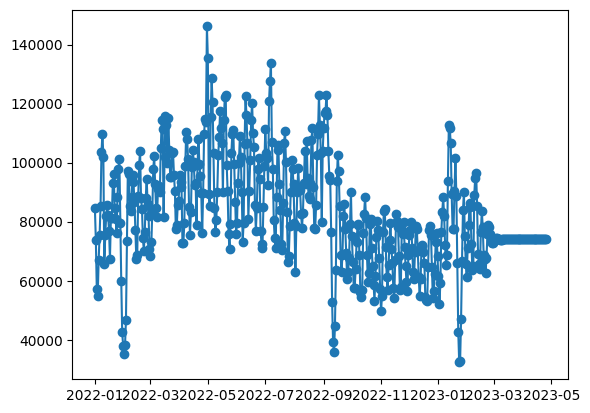

In [36]:
plt.plot(plus_predict1.index, plus_predict1.values, marker='o', linestyle='-')
# 예측값이 이상해보이긴 함

In [37]:
plus_predict1.values[-80:]

array([72336.        , 63717.        , 64963.        , 89096.        ,
       94939.        , 96566.        , 85427.        , 68946.        ,
       65784.        , 64075.        , 76554.        , 83624.        ,
       78286.        , 68762.        , 67271.        , 62603.        ,
       67775.        , 75680.        , 78981.53461835, 78322.98632052,
       75923.70481569, 73763.83249196, 72756.57752113, 72826.84965778,
       73422.63107868, 74007.34013931, 74307.89613112, 74317.93738738,
       74172.49239198, 74015.64223355, 73927.55983747, 73917.09129621,
       73951.86969579, 73993.56030012, 74018.98564052, 74023.86706477,
       74015.76700045, 74004.78960887, 73997.5464837 , 73995.68933134,
       73997.51044649, 74000.37254626, 74002.41186989, 74003.05335266,
       74002.66426058, 74001.92582194, 74001.35776667, 74001.14857767,
       74001.22515664, 74001.41351523, 74001.57017278, 74001.63579284,
       74001.62294202, 74001.5755032 , 74001.53270977, 74001.51270225,
      

브랜드 언급량을 잘 활용할 수 있을까 ?

언급량 데이터와 판매량 사이의 상관관계를 파악하고 싶음.

그러려면 데이터프레임을 합쳐주어야 하는데, 제품, 날짜별이므로

날짜가 행으로 가게 transpose 해주어야 함.

In [38]:
train_for_corr=train.drop(['ID','제품','대분류','중분류','소분류'],axis=1)
train_for_corr

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,B002-03799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,B002-03799,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,B002-03799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,B002-03799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [39]:
train_for_corr=train_for_corr.groupby('브랜드').sum()
train_for_corr.shape
type(train_for_corr)
train_for_corr

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B002-00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
B002-00003,0,0,0,22,37,39,30,28,23,19,...,0,0,0,0,0,0,0,0,0,11
B002-00005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,0,10,0,0,1
B002-00006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B002-03794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4,1,2,3,1,1
B002-03795,16,14,13,10,12,11,8,5,7,10,...,0,0,0,0,0,0,0,1,0,0
B002-03796,148,182,131,190,147,135,119,116,112,113,...,0,0,0,125,160,101,121,156,97,193


In [40]:
test_data=train_for_corr[train_for_corr.index=='B002-02920']
test_data

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-02920,2678,2584,2516,1953,2809,4159,3662,3097,3016,2485,...,0,0,0,7234,6687,6357,7400,6827,7202,5744


In [41]:
brand_keyword_cnt=brand_keyword_cnt.set_index('브랜드')

In [42]:
brand_keyword_cnt

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,1.232950,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,16.231500,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,0.754270,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,2.610960,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,0.333609,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B002-03794,2.32085,2.98810,3.611830,4.061500,3.669850,3.771390,3.031620,2.988100,3.133150,11.285170,...,2.422390,2.422390,2.756010,2.32085,2.088770,1.98723,1.07339,1.929210,2.509420,1.78416
B002-03795,0.14505,0.00000,0.087030,0.072520,0.087030,0.101530,0.072520,0.130540,0.116040,0.072520,...,0.000000,0.072520,0.000000,0.10153,0.101530,0.00000,0.00000,0.000000,0.000000,0.00000
B002-03796,0.00000,0.00000,0.000000,0.000000,0.000000,0.101530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.072520,0.07252


In [43]:
test_brand=brand_keyword_cnt[brand_keyword_cnt.index=='B002-02920']
test_brand

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-02920,0.623721,0.92834,0.638228,0.79778,0.507668,1.116905,0.957353,0.609215,0.768766,0.638228,...,0.710762,0.986367,1.43603,1.26195,1.087891,0.681748,0.623721,0.812286,1.058878,0.652735


In [44]:
test_data=test_data.T
test_brand=test_brand.T
test_brand

브랜드,B002-02920
2022-01-01,0.623721
2022-01-02,0.928340
2022-01-03,0.638228
2022-01-04,0.797780
2022-01-05,0.507668
...,...
2023-03-31,0.681748
2023-04-01,0.623721
2023-04-02,0.812286
2023-04-03,1.058878


In [45]:
test_data['언급량']=test_brand['B002-02920']
test_data

브랜드,B002-02920,언급량
2022-01-01,2678,0.623721
2022-01-02,2584,0.928340
2022-01-03,2516,0.638228
2022-01-04,1953,0.797780
2022-01-05,2809,0.507668
...,...,...
2023-03-31,6357,0.681748
2023-04-01,7400,0.623721
2023-04-02,6827,0.812286
2023-04-03,7202,1.058878


In [46]:
test_data.columns

Index(['B002-02920', '언급량'], dtype='object', name='브랜드')

In [47]:
test_data['B002-02920'].corr(test_data['언급량'])

-0.06223363636488672

상관관계가 거의 없는 듯 하다.

In [48]:
all_corr=[]
for i in range(train_for_corr.shape[0]):
  corr=train_for_corr.iloc[i].corr(brand_keyword_cnt.iloc[i])
  all_corr.append(corr)

(array([   3.,   18.,   79.,  309., 1250.,  989.,  310.,   81.,   31.,
          15.]),
 array([-0.582071  , -0.46649956, -0.35092812, -0.23535668, -0.11978524,
        -0.00421381,  0.11135763,  0.22692907,  0.34250051,  0.45807195,
         0.57364339]),
 <BarContainer object of 10 artists>)

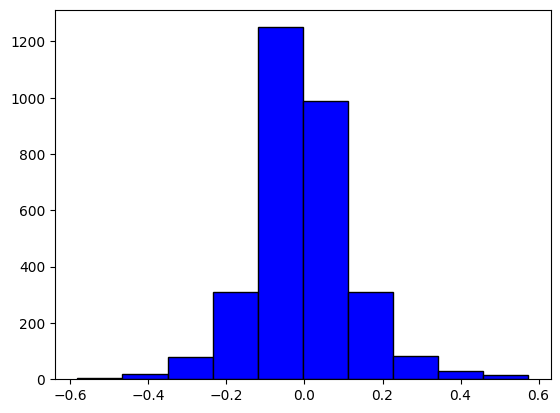

In [49]:
# 모든 브랜드의 판매량과 언급량의 상관관계, 대부분의 브랜드가 언급량과 판매량 사이의 관계가 크지 않음을 알 수 있다.
# 높은 것도 있긴 한데 흠.. 사용할 수 있나
plt.hist(all_corr, bins=10, color='blue', edgecolor='black')

In [50]:
plus_sorted_list = sorted(all_corr, reverse=True)
plus_values = plus_sorted_list[:10]

minus_sorted_list = sorted(all_corr, reverse=False)
minus_values=minus_sorted_list[:10]
print(plus_values,minus_values)

[nan, 0.5736433895465859, 0.5209723811815608, 0.43220408254297493, 0.33737883858828466, 0.30961764796812213, 0.23431142744564334, 0.22884824561382114, 0.20650832197272087, 0.20631604254789518] [-0.37694564657210317, -0.36713531489378914, -0.2651675239355521, -0.22780296562561647, -0.21833250472672114, -0.20580866861568498, -0.20396504491529027, -0.1449913191853106, -0.14458442659735343, -0.13207953933074218]


In [51]:
print(all_corr.index(0.5736433895465859),all_corr.index(0.5209723811815608),all_corr.index(0.43220408254297493),all_corr.index(0.33737883858828466),all_corr.index(0.30961764796812213))
print(all_corr.index(-0.37694564657210317),all_corr.index(-0.36713531489378914))

12 822 969 771 39
42 53


In [52]:
indicies=[12,822,969,771,39,42,53]
for i in indicies:
  print(train_for_corr.iloc[i].name)

B002-00015
B002-00983
B002-01153
B002-00920
B002-00049
B002-00053
B002-00066


위의 브랜드가 언급량과 판매량의 상관관계가 절대값 0.3 이상인 브랜드임.

브랜드에 대한 정보를 알 수 있을까?

In [53]:
aa=pd.concat([train[train['브랜드']=='B002-00015'],train[train['브랜드']=='B002-00983'],train[train['브랜드']=='B002-01153'],train[train['브랜드']=='B002-00920'],
              train[train['브랜드']=='B002-00049'],train[train['브랜드']=='B002-00053'],train[train['브랜드']=='B002-00066']])

In [54]:
aa['제품'].values

array(['B002-00015-00001', 'B002-00015-00002', 'B002-00983-00001',
       'B002-01153-00001', 'B002-01153-00002', 'B002-01153-00003',
       'B002-01153-00004', 'B002-01153-00005', 'B002-01153-00006',
       'B002-01153-00007', 'B002-01153-00008', 'B002-01153-00009',
       'B002-01153-00010', 'B002-01153-00011', 'B002-01153-00012',
       'B002-01153-00013', 'B002-01153-00014', 'B002-01153-00015',
       'B002-00920-00001', 'B002-00049-00001', 'B002-00053-00001',
       'B002-00053-00002', 'B002-00066-00001', 'B002-00066-00002',
       'B002-00066-00003', 'B002-00066-00004', 'B002-00066-00005',
       'B002-00066-00006'], dtype=object)

In [55]:
pd.set_option('display.max_rows', None)  # 모든 행 보기
pd.set_option('display.max_columns', None)

In [56]:
result = pd.merge(product_info, aa, on='제품')
result
# 언급량과 판매량의 상관관계가 큰 제품들의 특성도 뚜렷하지 않음
# 약, 치약, 샴푸 정도가 있음
# 홍삼 농축액 상관관계 0.57
# 무슨 알약인데 정보 없음 0.52
# 바디클렌저 0.43
# 플라보노이드? -0.37
# 비타민, 약 -0.36
# 뭔가 관계를 찾을 수 없음
result[result['제품'].str.contains("B002-00066")]['제품특성']

0    주요 기능성(식약처인증):영양보충 영양소 원료명(식약처고시):비타민A 영양소 원료명...
1    제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
2    주요 기능성(식약처인증):해당 없음, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제...
4    제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량:액상, 제품타입섭취방법섭취대상섭...
Name: 제품특성, dtype: object

이상치 처리

In [71]:
outlier_data=train[(train['제품']=='B002-02920-00004')|(train['제품']=='B002-02920-00005')]
outlier_data.loc['sum'] = outlier_data.iloc[:, 6:].sum()
outlier_data

<ipython-input-71-1fbe80886e6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data.loc['sum'] = outlier_data.iloc[:, 6:].sum()


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

In [72]:
outlier_data2=outlier_data.iloc[2:]

In [73]:
outlier_data2

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

In [74]:
outlier_data2=outlier_data2.iloc[:,6:]
outlier_data2

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-1

Text(0.5, 1.0, 'diaper sales rate')

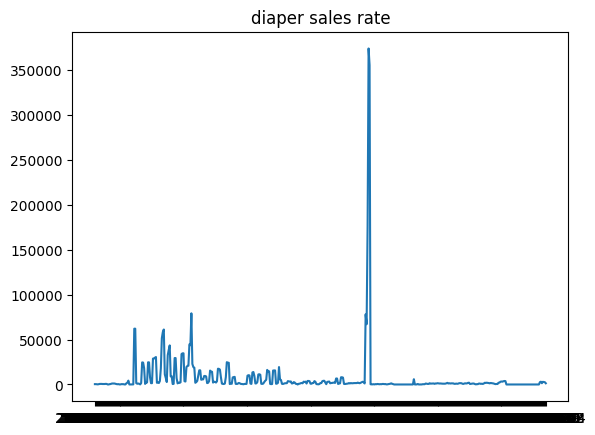

In [84]:
plt.plot(outlier_data2.loc['sum'])
plt.title("diaper sales rate")

단순 평균 대체

In [89]:
outlier_data2.loc['sum'].mean()

6940.860566448801

In [96]:
outlier_data2.columns[outlier_data2.loc['sum'] >= 100000]

Index(['2022-10-05', '2022-10-06', '2022-10-07'], dtype='object')

In [102]:
train.loc[train['제품'] == 'B002-02920-00004', ['2022-10-05', '2022-10-06', '2022-10-07']] = 6941
train.loc[train['제품'] == 'B002-02920-00005', ['2022-10-05', '2022-10-06', '2022-10-07']] = 6941

대체 후 11개로 분류해서 아리마

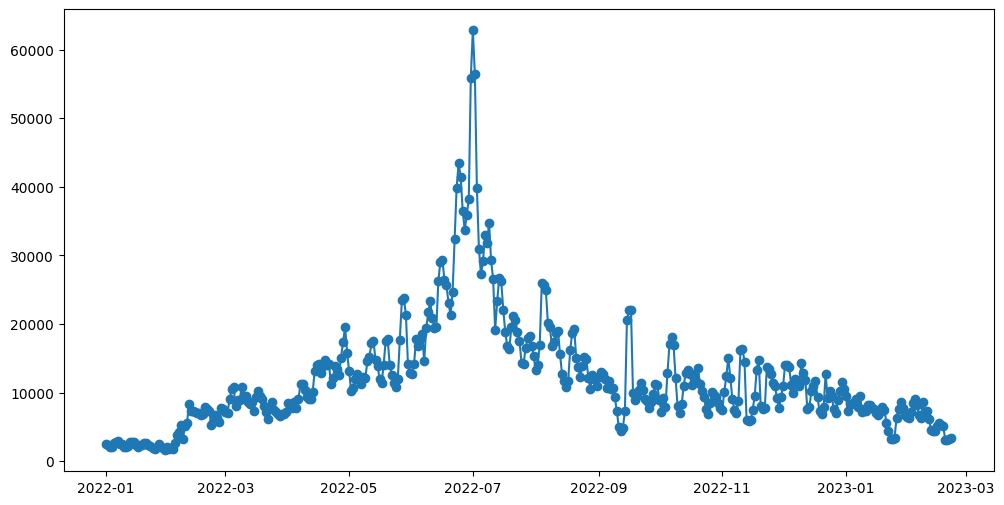

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(data2_sum.index, data2_sum.values, marker='o', linestyle='-')

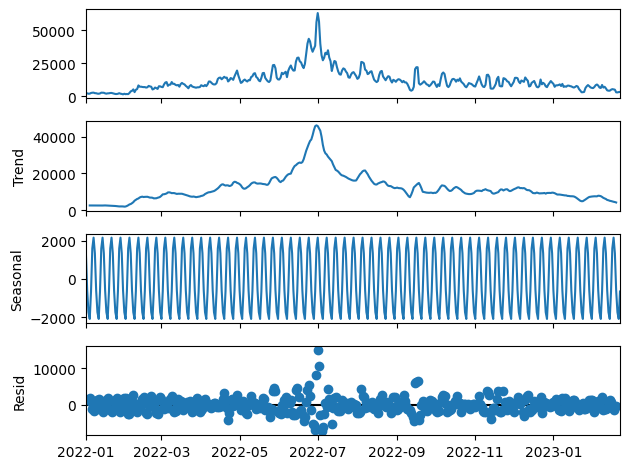

In [120]:
result2 = seasonal_decompose(data2_sum, model = 'addictive', period=7)
result2.plot()
plt.show()

In [105]:
adf_test(data2_sum)

ADF Statistics: -2.296272
p-value: 0.173173
num of lags: 8.000000
num of observations: 409.000000
Critical values:
	1%: -3.446
	5%: -2.869
	10%: -2.571


<Axes: >

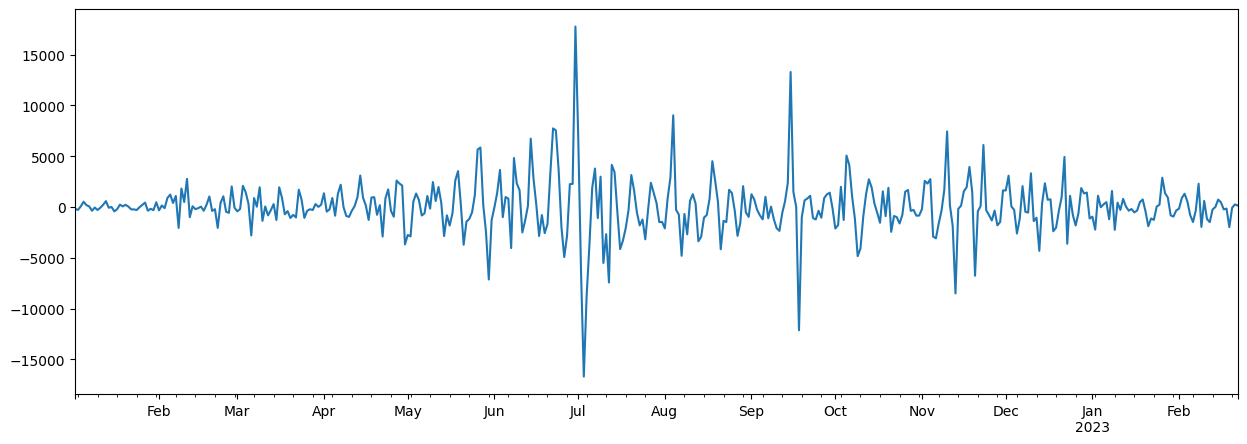

In [106]:
diff2 = data2_sum.diff().dropna()
diff2.plot(figsize=(15,5))

In [107]:
adf_test(diff2)

ADF Statistics: -7.384944
p-value: 0.000000
num of lags: 9.000000
num of observations: 407.000000
Critical values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [122]:
model2 = pm.auto_arima(
            y=data2_sum,
            d=1,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=True,
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7753.736, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7708.882, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7708.481, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7751.738, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7705.828, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7625.520, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7691.055, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7577.930, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7684.558, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7575.932, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7682.564, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7623.527, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7703.828, Time=0.09 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 2.688 seconds


In [123]:
forecast2, conf_int2 = model2.predict(n_periods=62, return_conf_int=True)

# 예측 결과 출력
print("예측값:", forecast2)

# 신뢰구간 출력
print("신뢰구간:", conf_int2)

예측값: 2023-02-23    3923.060485
2023-02-24    4051.852659
2023-02-25    3755.011413
2023-02-26    3276.244924
2023-02-27    2963.649802
2023-02-28    3019.105946
2023-03-01    3371.365900
2023-03-02    3749.788075
2023-03-03    3889.718102
2023-03-04    3715.413738
2023-03-05    3375.711278
2023-03-06    3120.834965
2023-03-07    3119.904466
2023-03-08    3350.930049
2023-03-09    3633.089887
2023-03-10    3766.232904
2023-03-11    3671.346483
2023-03-12    3434.530716
2023-03-13    3232.596908
2023-03-14    3202.416587
2023-03-15    3349.602000
2023-03-16    3556.315131
2023-03-17    3673.956480
2023-03-18    3628.916160
2023-03-19    3466.916325
2023-03-20    3310.680216
2023-03-21    3267.997062
2023-03-22    3358.333623
2023-03-23    3507.212201
2023-03-24    3606.212098
2023-03-25    3591.152325
2023-03-26    3482.638717
2023-03-27    3364.222718
2023-03-28    3318.872990
2023-03-29    3371.513432
2023-03-30    3476.919577
2023-03-31    3557.320701
2023-04-01    3559.211450
2023-04

In [124]:
plus_predict2 = pd.concat([data2_sum, forecast2], axis=0)
plus_predict2

2022-01-01     2532.000000
2022-01-02     2335.000000
2022-01-03     2045.000000
2022-01-04     2110.000000
2022-01-05     2618.000000
2022-01-06     2799.000000
2022-01-07     2856.000000
2022-01-08     2479.000000
2022-01-09     2418.000000
2022-01-10     2117.000000
2022-01-11     2043.000000
2022-01-12     2263.000000
2022-01-13     2836.000000
2022-01-14     2756.000000
2022-01-15     2754.000000
2022-01-16     2317.000000
2022-01-17     2096.000000
2022-01-18     2319.000000
2022-01-19     2373.000000
2022-01-20     2583.000000
2022-01-21     2627.000000
2022-01-22     2389.000000
2022-01-23     2147.000000
2022-01-24     1848.000000
2022-01-25     1822.000000
2022-01-26     2016.000000
2022-01-27     2442.000000
2022-01-28     2071.000000
2022-01-29     1888.000000
2022-01-30     1574.000000
2022-01-31     2036.000000
2022-02-01     1701.000000
2022-02-02     1847.000000
2022-02-03     1726.000000
2022-02-04     2612.000000
2022-02-05     3829.000000
2022-02-06     4221.000000
2

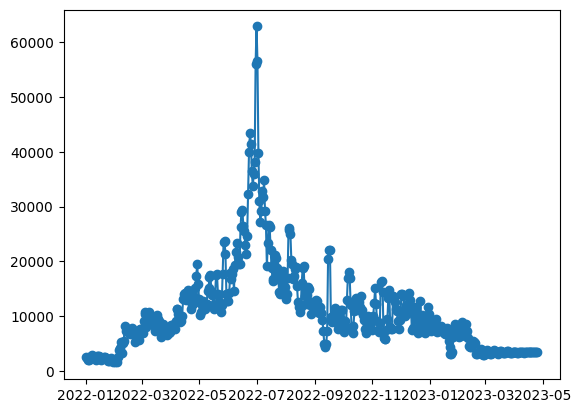

In [125]:
plt.plot(plus_predict2.index, plus_predict2.values, marker='o', linestyle='-')
# 예측값이 이상해보이긴 함